<a href="https://colab.research.google.com/github/Liang130520/OpenCV-class1019/blob/main/OpenCV_classs1019-%E7%99%BD%E5%B9%B3%E8%A1%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
" 作業一 "
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image
import time

pic = cv2.imread("h2.png", -1)
print(pic.shape[0]) # 612
print(pic.shape[1]) # 1087

pic_multiply = cv2.multiply(pic, (100, 100, 100, 0)) # multiply 非進行顏色變化用, 多用於還原檔案
pic_word = pic_multiply[:,:,1]
cv2_imshow(pic_multiply[120:500,200:920,1])
pic_white = np.full((612, 1087, 3), (255, 255, 255), np.uint8)
pic_white = pic_white[:, :, 1]
pic_white[120:500, 200:920] = pic_word[120:500,200:920]
cv2_imshow(pic_white)


In [ ]:
pic1 = cv2.add(pic, (255,220,255,0)) # 第四維度:透明度通常用不到
pic2 = cv2.absdiff(pic, (255, 255, 255,0)) # 類似負片效果, absdiff採用絕對值相減
cv2_imshow(pic2)

pic3 = cv2.add(pic,(255, 255, 255, 0)) # 變成全白, add效果往上加, 超過255, 以255論
cv2_imshow(pic3)

pic4 = cv2.subtract(pic,(0, 0, 255, 0)) # 變成全(藍+綠), subtract效果往下減, 低於0, 以0論
cv2_imshow(pic4)

pic5 = cv2.subtract(pic, (255, 255, 255, 0)) # 變成全黑, subtract效果往下減, 低於0, 以0論
cv2_imshow(pic5)

m2 = np.full(pic.shape, (200, 200, 100), np.uint8) # pic.shape是取得 pic 的尺寸, 但沒有圖片
cv2_imshow(m2)

In [ ]:
pic_divide = cv2.divide(pic, (25, 25, 25, 0)) # divide 會做四捨五入, 故 no 浮點數, 非進行顏色變化用, 多用於壓縮檔案
cv2_imshow(pic_divide)

pic_multiply = cv2.multiply(pic, (100, 100, 100, 0)) # multiply 非進行顏色變化用, 多用於還原檔案
cv2_imshow(pic_multiply[120:500,200:920,1])


pic_divide[25:425, 50:350] = pic_multiply[100:500, 500:800]
cv2_imshow(pic_divide)
# 先 divide 後, 再 multiply, 易出現色彩減化的情況, 可理解為色彩連續性不佳, 因 divide 會進行四捨五入的動作

In [ ]:
pic_bitwise_not = cv2.bitwise_not(pic) # bitwise 為以二進位方式進行處理, not 則是以相反方式進行處理, 簡易理解為0 -> 1, 1 -> 0的方式進行處理, 故變成負片效果
cv2_imshow(pic_bitwise_not)

In [ ]:
" numpy矩陣 圖片顏色計算 " # 「低於」或「超過」將會從另一端繼續計算
# 若要呈現效果, 大多不會用這種計算方式, 除了只要計算位置, 無須呈現效果方適合用這種結果
pic_numpy_add = pic + 150
cv2_imshow(pic_numpy_add)

pic_numpy_subtract = pic_numpy_add - 150
cv2_imshow(pic_numpy_subtract)

In [ ]:
" 圖片縮放 "
# 若需等比例縮放, 可先以圖片寬/圖片長取得長寬比, 再以此進行縮放大小
w =2000 # 若以下方計算方式, 可隨意設計此數, 皆會以等比例縮放
h = int(pic.shape[1] / (pic.shape[0]/w)) # 設 h 為高, w 為寬, 依同長寬比計算, h * 圖長 = w * 圖高
# 須注意: 除法會有浮點數, 需轉換為整數, 任意方式皆可
pic_resize = cv2.resize(pic, (w, h)) # 以(寬, 高)進行縮小放大
cv2_imshow(pic_resize)

" 圖片翻轉 "
pic_flip = cv2.flip(pic, 0) # 1 -> 左右 , 0 -> 上下 , -1 -> 上下左右
cv2_imshow(pic_flip)

In [ ]:
" 圖像旋轉 "
# 結果圖像=cv2.warpAffine(圖像變數, 變換矩陣, 輸出的圖像大小)
# 結果圖像=cv2.warpAffine(pic, cv2.getRotationMatrix2D(旋轉中心, 角度, 縮放比率), Tuple類型：(寬, 高))
cx = int(pic.shape[1]/2)
cy = int(pic.shape[0]/2)
pic_turn_round = cv2.warpAffine(pic, cv2.getRotationMatrix2D((cx, cy), 45, 0.5), (pic.shape[1],pic.shape[0]))
cv2_imshow(pic_turn_round)

In [ ]:
print(pic.shape[0], pic.shape[1])
cv2_imshow(pic1[120:500, 200:920])
cv2_imshow(pic[:,500:])
cv2_imshow(pic[:,:,1]) # 0,1,2為BGR順序, 僅為取得該顏色係數, 且以似灰階呈現 
cv2_imshow(pic1)
pic[50:450:2, 100:300:2] = pic2[100:500:2, 600:800:2] # 以網格狀插入其中
cv2_imshow(pic)


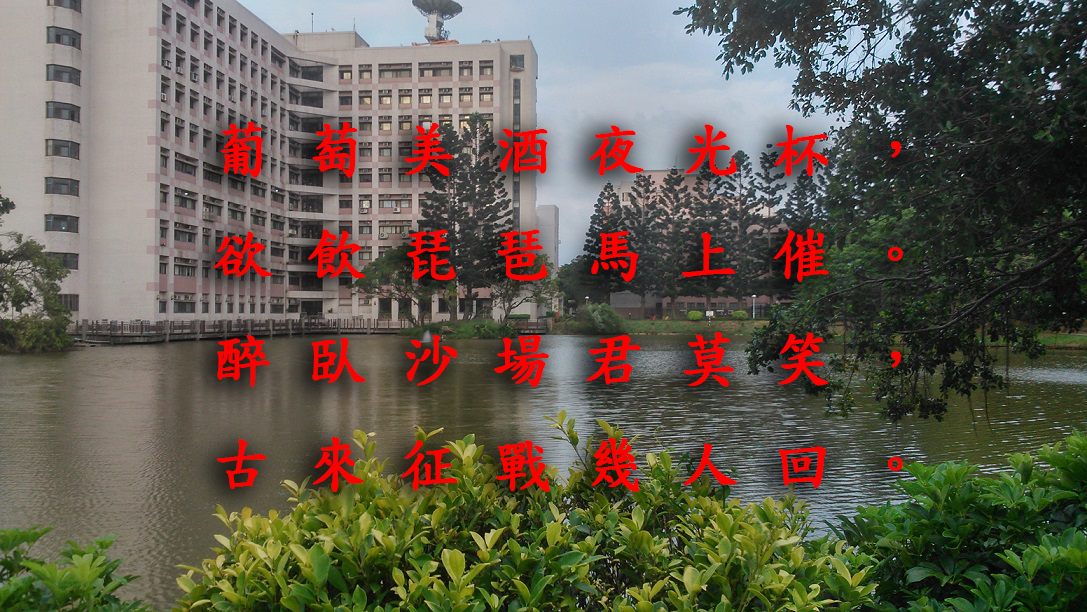

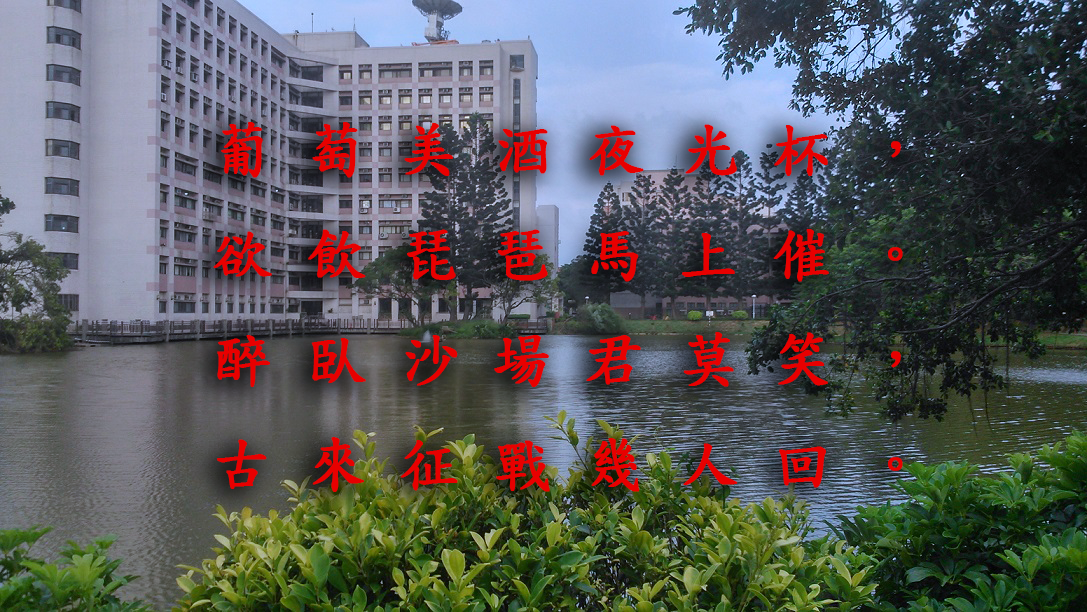

In [197]:
" 白平衡 "
# 白平衡的計算公式：
# R × (𝑅𝑎𝑣𝑔+𝐺𝑎𝑣𝑔+𝐵𝑎𝑣𝑔/(3 × 𝑅𝑎𝑣𝑔))
# G × (𝑅𝑎𝑣𝑔+𝐺𝑎𝑣𝑔+𝐵𝑎𝑣𝑔/(3 × G𝑎𝑣𝑔))
# B × (𝑅𝑎𝑣𝑔+𝐺𝑎𝑣𝑔+𝐵𝑎𝑣𝑔/(3 × B𝑎𝑣𝑔))

# 取平均：圖像變數.mean()
Bavg = pic[:,:,0].mean()
Gavg = pic[:,:,1].mean()
Ravg = pic[:,:,2].mean()

# 取平均總和
ColorAvg = Bavg + Gavg + Ravg

# 處理白平衡
pic_balance = pic.copy()
pic_balance[:,:,0] = cv2.multiply(pic[:,:,0],(ColorAvg/(Bavg*3)))
pic_balance[:,:,1] = cv2.multiply(pic[:,:,1],(ColorAvg/(Gavg*3)))
pic_balance[:,:,2] = cv2.multiply(pic[:,:,2],(ColorAvg/(Ravg*3)))

cv2_imshow(pic)
cv2_imshow(pic_balance)